In [2]:
from sklearn import datasets
cancer = datasets.load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
cancer.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [6]:
import pandas as pd

In [7]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [8]:
# Get the number of rows and columns in the dataset
num_rows, num_columns = df.shape

print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

print("\nWhat the rows and columns represent:")
print("Rows: Each row represents a single breast cancer sample/patient.")
print("Columns: Each column represents a feature (characteristic) of the breast cancer samples.")
print("\nList of features:")
for feature in cancer.feature_names:
    print(f"- {feature}")


Number of rows: 569
Number of columns: 30

What the rows and columns represent:
Rows: Each row represents a single breast cancer sample/patient.
Columns: Each column represents a feature (characteristic) of the breast cancer samples.

List of features:
- mean radius
- mean texture
- mean perimeter
- mean area
- mean smoothness
- mean compactness
- mean concavity
- mean concave points
- mean symmetry
- mean fractal dimension
- radius error
- texture error
- perimeter error
- area error
- smoothness error
- compactness error
- concavity error
- concave points error
- symmetry error
- fractal dimension error
- worst radius
- worst texture
- worst perimeter
- worst area
- worst smoothness
- worst compactness
- worst concavity
- worst concave points
- worst symmetry
- worst fractal dimension


In [9]:
# Count the number of malignant cases
malignant_count = (cancer.target == 0).sum()

print(f"Total number of malignant cases: {malignant_count}")


Total number of malignant cases: 212


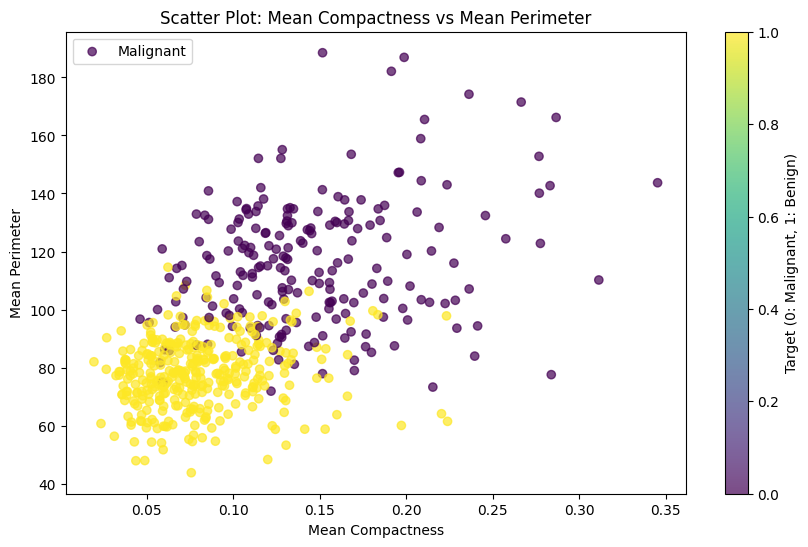

In [11]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['mean compactness'], df['mean perimeter'], 
                      c=cancer.target, cmap='viridis', alpha=0.7)

# Set labels and title
plt.xlabel('Mean Compactness')
plt.ylabel('Mean Perimeter')
plt.title('Scatter Plot: Mean Compactness vs Mean Perimeter')

# Add a color bar
cbar = plt.colorbar(scatter)
cbar.set_label('Target (0: Malignant, 1: Benign)')

# Add a legend
plt.legend(['Malignant', 'Benign'], loc='upper left')

# Show the plot
plt.show()


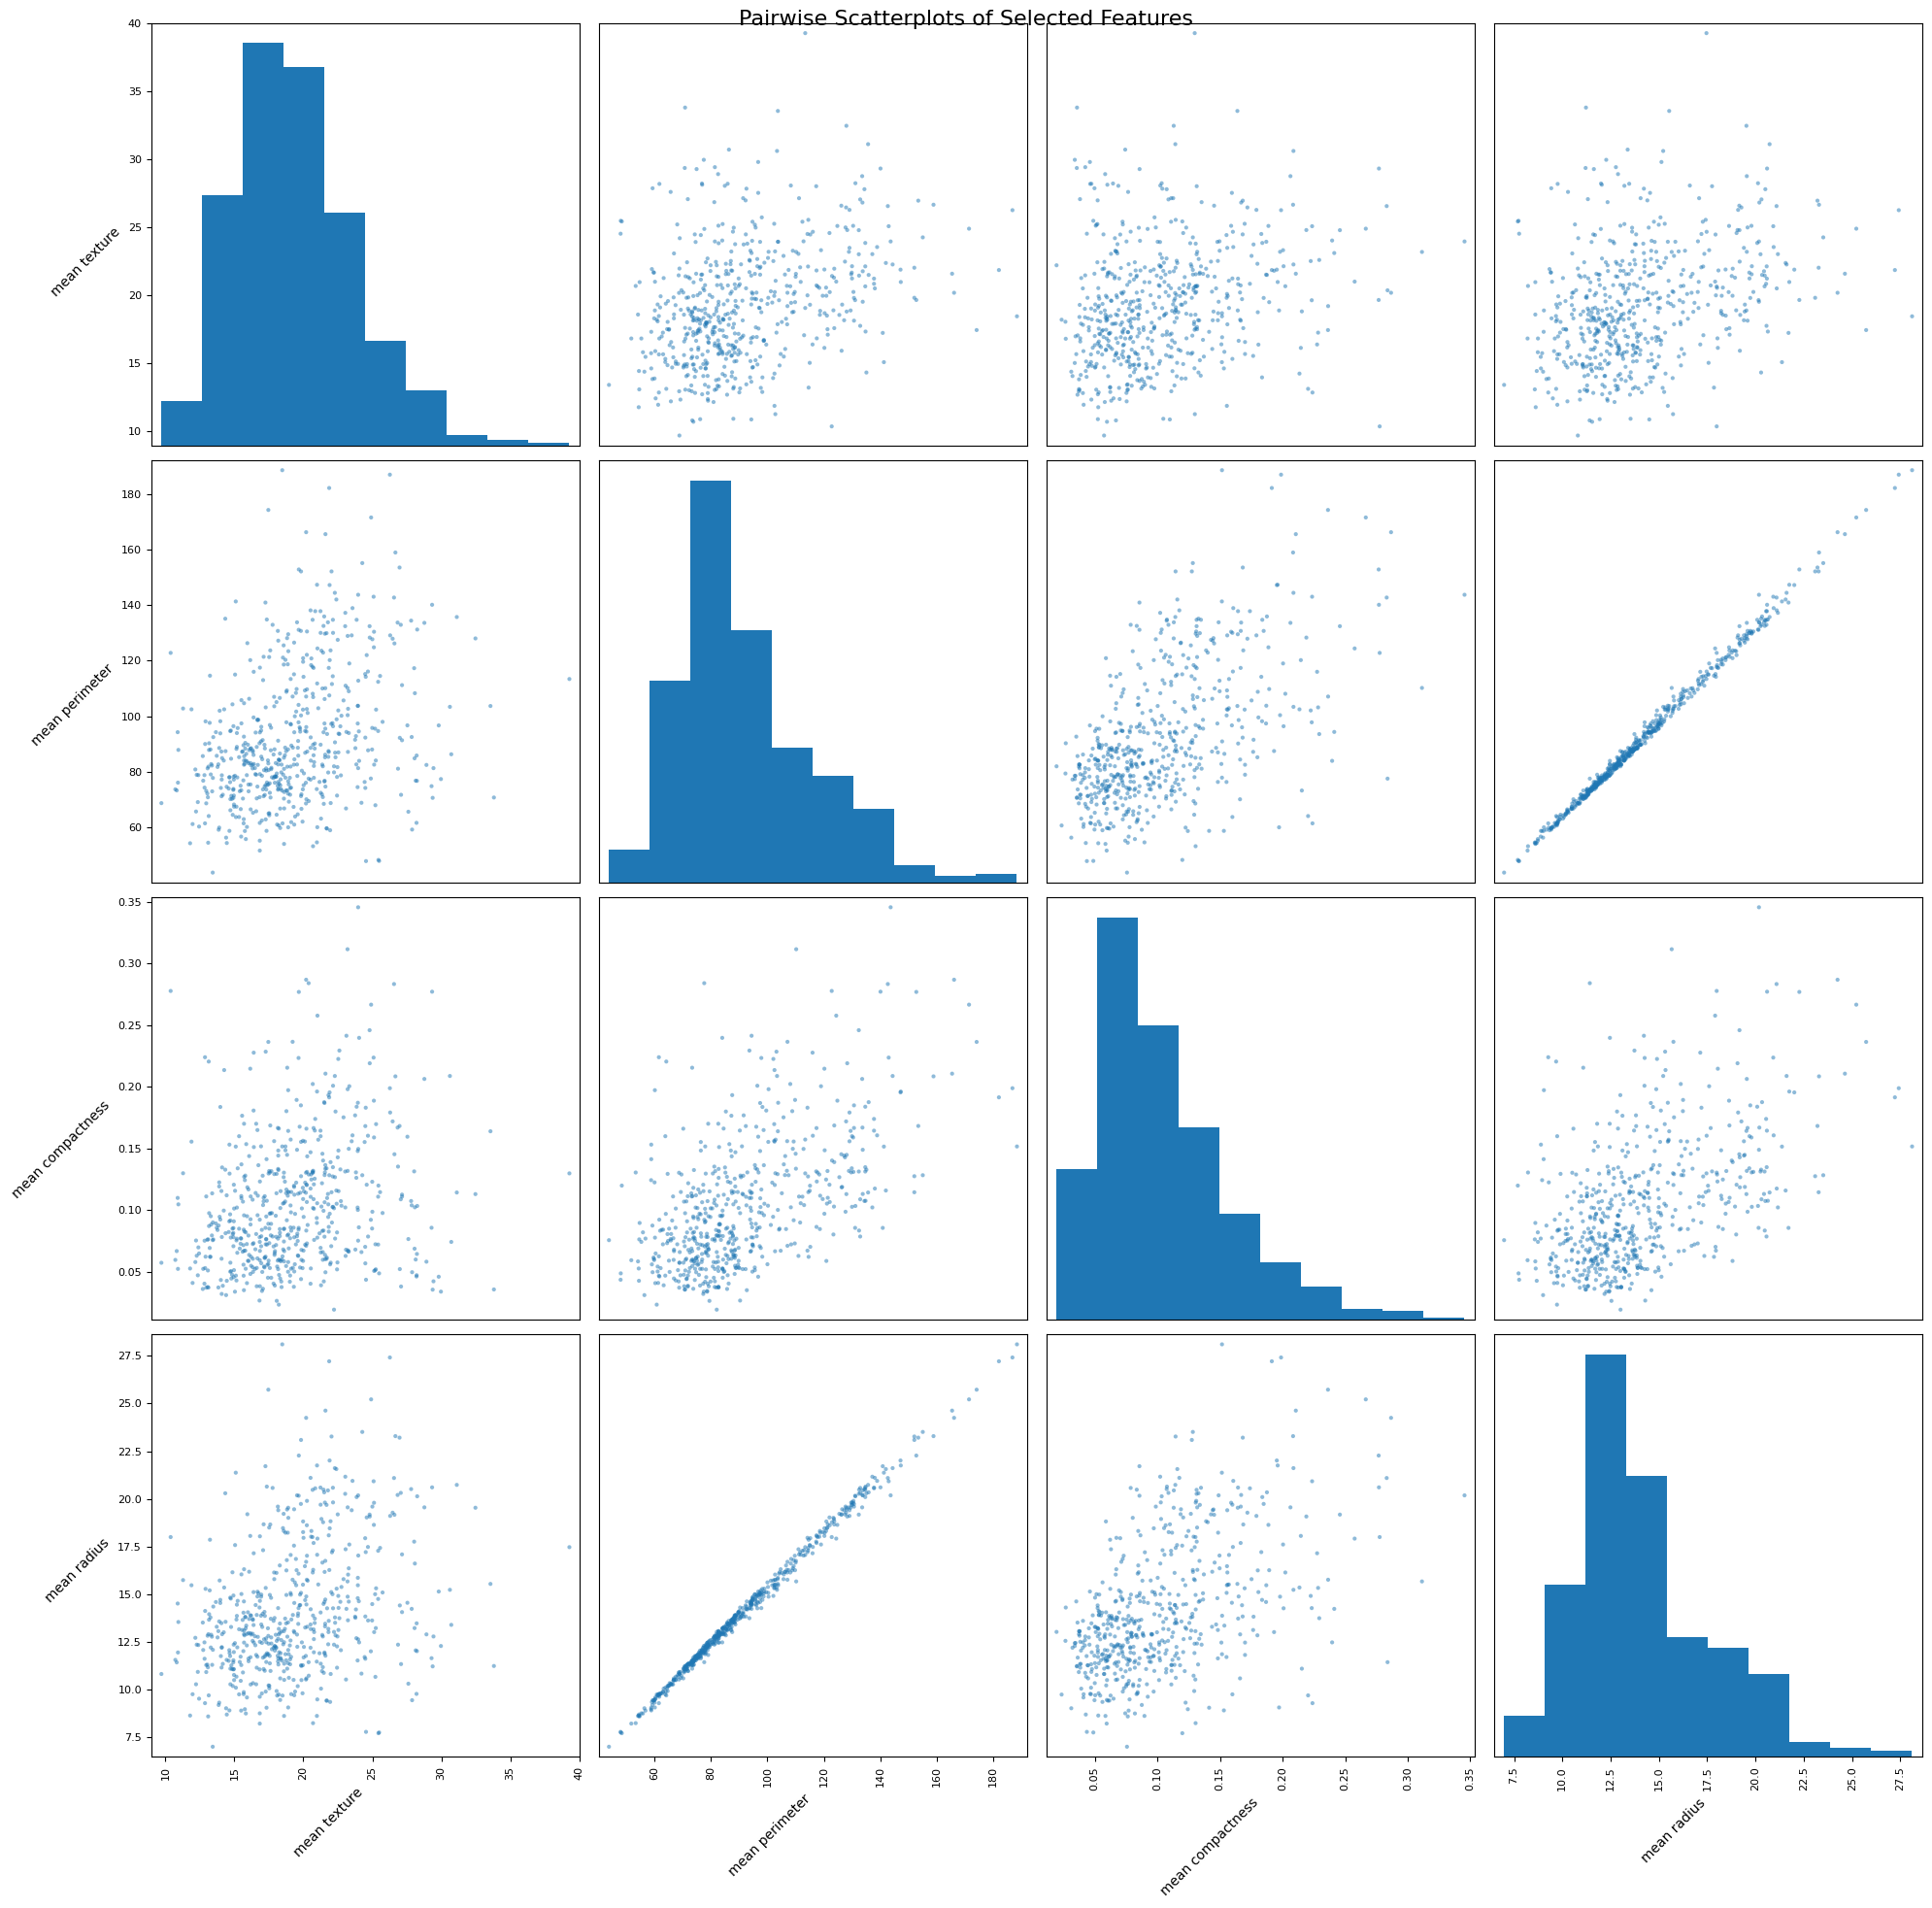

Observation:
From the pairwise scatterplots, we can see that 'mean radius' and 'mean perimeter' seem to be particularly correlated.
This strong correlation is likely because the perimeter of a circular or near-circular object (like a tumor) 
is directly proportional to its radius. As the radius increases, the perimeter will increase proportionally.
The relationship appears to be nearly linear, which is consistent with the mathematical relationship 
between radius and perimeter in a circle (perimeter = 2 * π * radius).


In [12]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

# Select the features we want to plot
features_to_plot = ['mean texture', 'mean perimeter', 'mean compactness', 'mean radius']

# Create a subset of the dataframe with only these features
df_subset = df[features_to_plot]

# Create the scatter matrix
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))
scatter_matrix(df_subset, ax=axes, diagonal='hist')

# Customize the plot
plt.suptitle('Pairwise Scatterplots of Selected Features', fontsize=16)
for ax in axes.flatten():
    ax.set_xlabel(ax.get_xlabel(), rotation=45, ha='right')
    ax.set_ylabel(ax.get_ylabel(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# Observation
print("Observation:")
print("From the pairwise scatterplots, we can see that 'mean radius' and 'mean perimeter' seem to be particularly correlated.")
print("This strong correlation is likely because the perimeter of a circular or near-circular object (like a tumor) ")
print("is directly proportional to its radius. As the radius increases, the perimeter will increase proportionally.")
print("The relationship appears to be nearly linear, which is consistent with the mathematical relationship ")
print("between radius and perimeter in a circle (perimeter = 2 * π * radius).")
